In [283]:
import warnings
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


warnings.filterwarnings('ignore')

### A: summarize the data

Below is the Count of all columns for each row. As we can see below there are a total of 1949 rows, however some of these rows have empty values for their columns which is evident in the lower counts for some columns such as log GDP per capita and Health Life expectancy at birth. To handle missing values, rows with NaN will be dropped


NOTE: dropping year as specified in the instructions

In [284]:
df = pd.read_csv('happiness_data.csv').drop(columns=['year']).dropna()
print(df.count())

Country name                        1708
Life Ladder                         1708
Log GDP per capita                  1708
Social support                      1708
Healthy life expectancy at birth    1708
Freedom to make life choices        1708
Generosity                          1708
Perceptions of corruption           1708
Positive affect                     1708
Negative affect                     1708
dtype: int64


Country Name is categorical

In [285]:

print("========= Unique Countries =========")
categorical_vals = df['Country name'].unique()
print(categorical_vals)

========= Unique Countries =========
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'Colombia'
 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Mal

### B. Displaying statistical values

The rest of the columns contain continuos variable. plotted below are some of the basic statistics of these variables including but not limited to mean, std, and minimums

In [286]:
continuos_variables = df.drop(columns=['Country name'])

In [287]:
continuos_variables.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.00000,1708.000000
mean,5.446680,9.321709,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446
std,1.136592,1.158344,0.121638,7.687011,0.142846,0.162103,0.186028,0.10819,0.083083
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000
25%,4.595000,8.394000,0.741000,58.175000,0.644000,-0.111250,0.697000,0.62300,0.208000
50%,5.364000,9.456500,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000
75%,6.259000,10.272000,0.908000,68.685000,0.852000,0.089000,0.875000,0.80125,0.319250
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000


array([[<Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>],
       [<Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>,
        <Axes: title={'center': 'Negative affect'}>]], dtype=object)

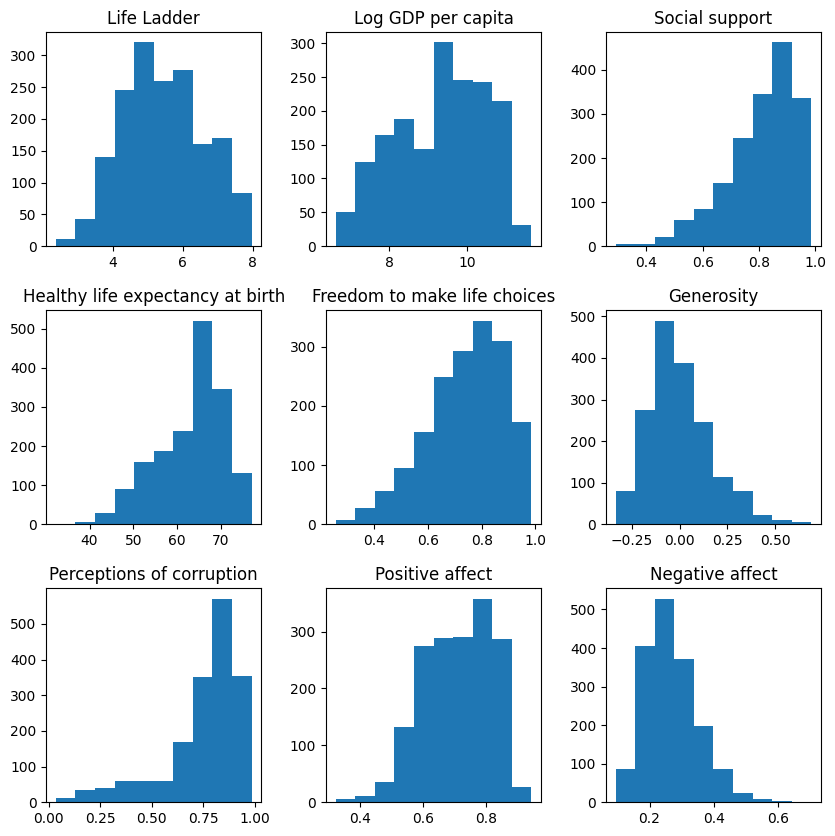

In [288]:
continuos_variables.hist( grid=False, figsize=(10,10))

Observations on the data:

A majority of values seem to be along a gaussian distribution however some variable such as Perceptions of corruption, Freedom to make life choices, and Healthy life expectancy at birth are left skewed. These variables may need to be scaled depending of if Batch GD, stochastic GD, or mini-batch GD are being used in linear regression

### C. Exploring Relationships Between Columns

Correlation between continuos columns

<Axes: >

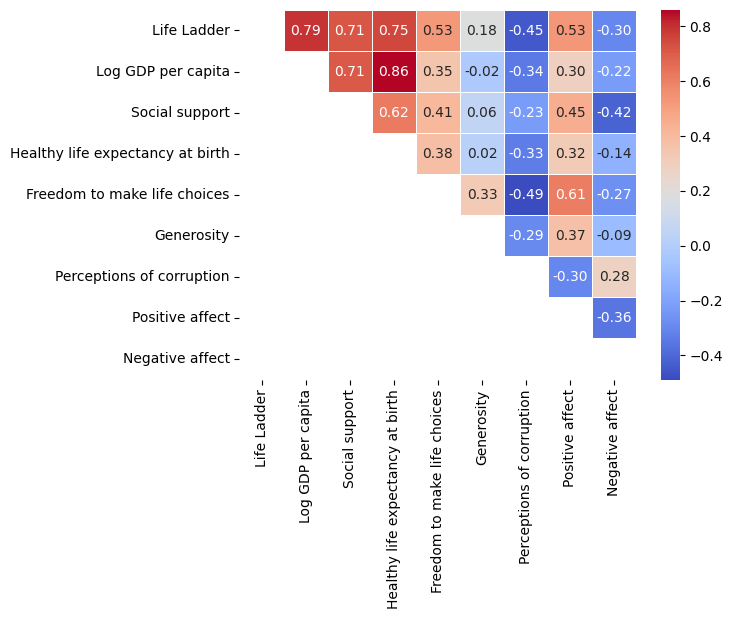

In [289]:
correlation_matrix = continuos_variables.corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

scatter plots between all unique pairs of continuos columns

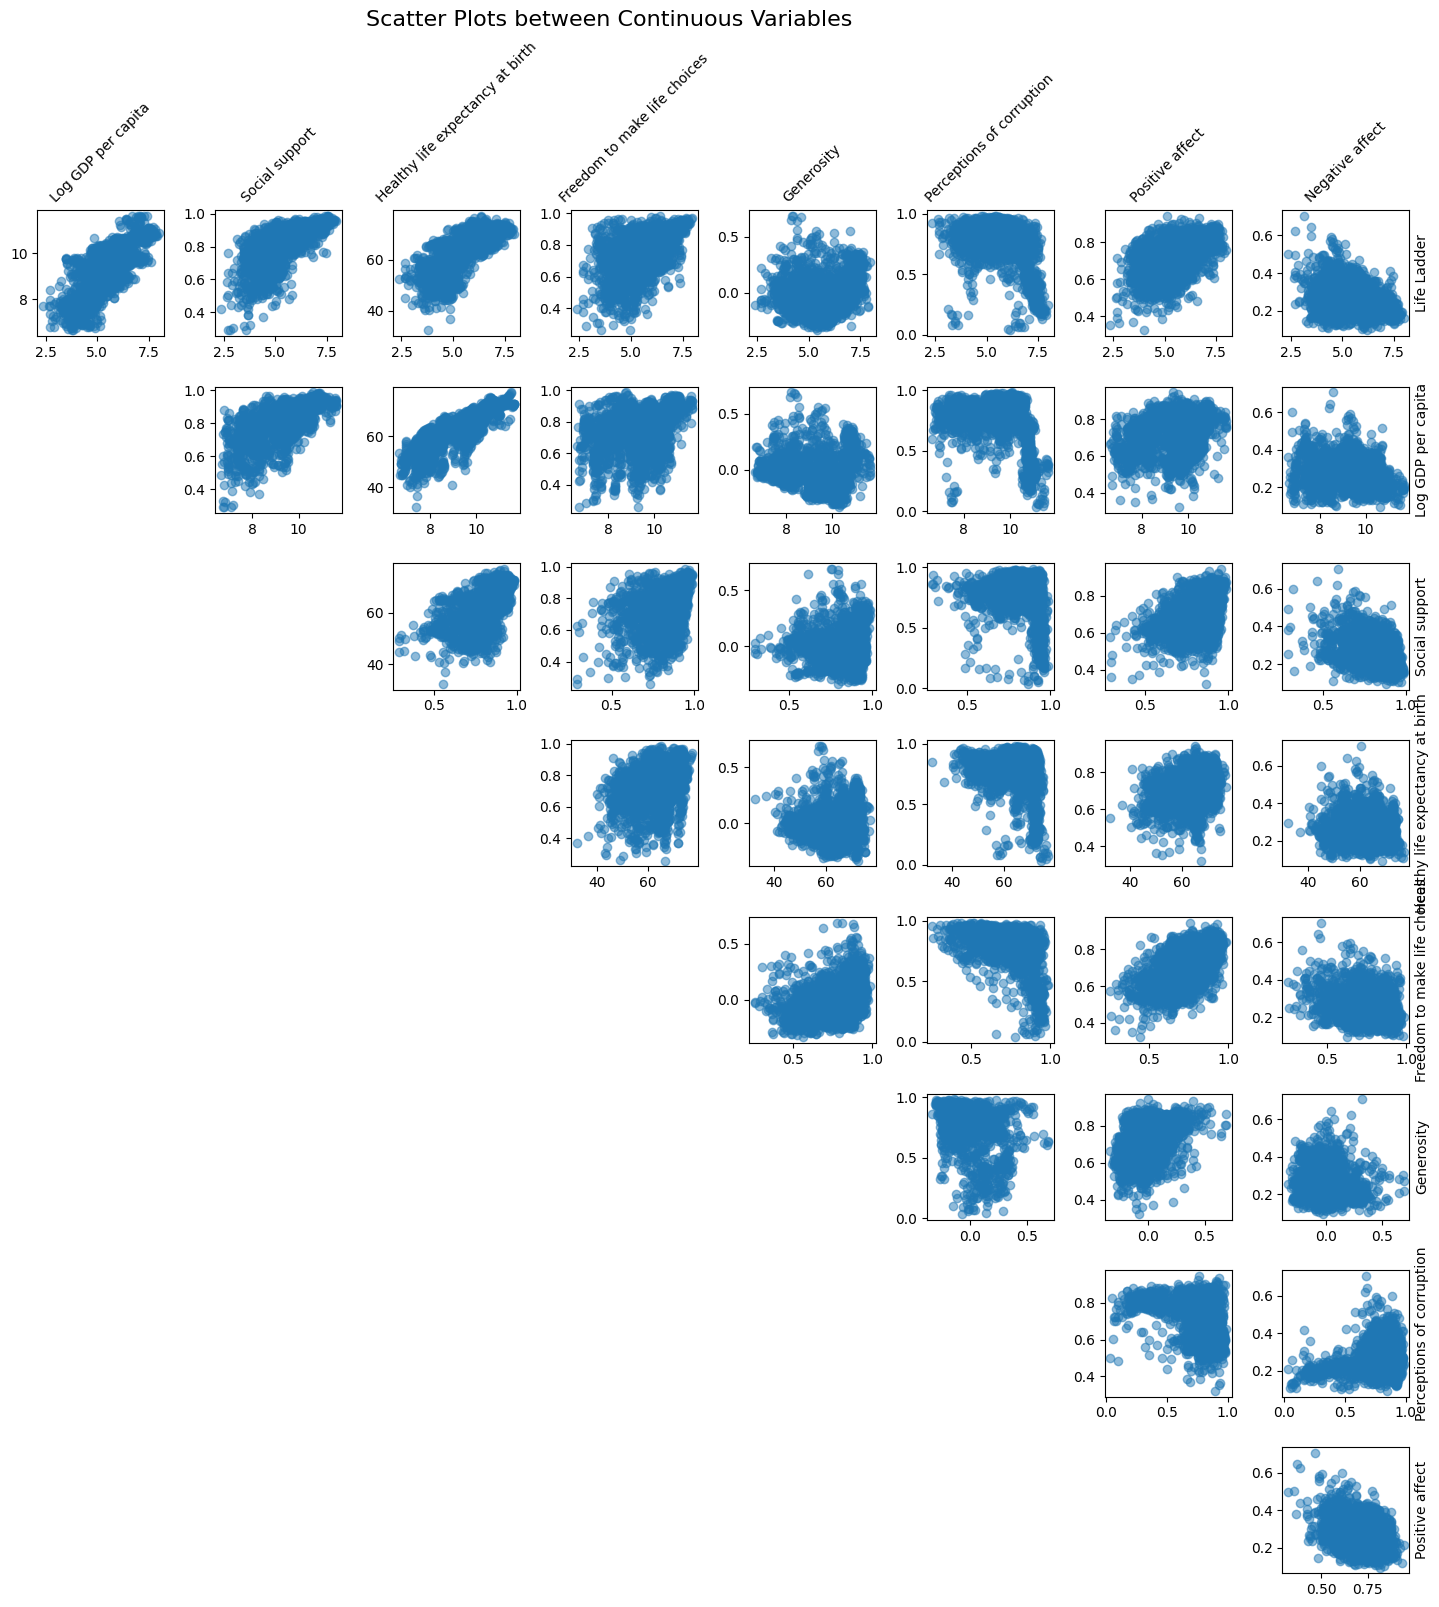

In [290]:
cols = continuos_variables.columns.tolist()
num_cols = len(cols)

# Set the size of the grid
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(num_cols):
    for j in range(num_cols):
        # Only plot in the upper triangle (when column index j > i)
        if i < j: 
            col1 = cols[i]
            col2 = cols[j]
            axes[i, j].scatter(continuos_variables[col1], continuos_variables[col2], alpha=0.5)
            
            # Set labels for the x and y axes
            if i == 0:
                axes[i, j].set_title(col2, fontsize=10, rotation=45)
            if j == num_cols - 1:
                axes[i, j].set_ylabel(col1, fontsize=10,)
                axes[i, j].yaxis.set_label_position("right")

        else:
            axes[i, j].set_visible(False) 


for i in range(num_cols):
    axes[num_cols-1, i].set_xlabel(cols[i], fontsize=10)


plt.suptitle('Scatter Plots between Continuous Variables', fontsize=16)
plt.show()

### D. Select 25% of the data for testing

Splitting the data into 75-25 split we check the validity by checking the similarity between the train and test data

In [291]:
X = continuos_variables.drop('Life Ladder', axis=1).values
y = continuos_variables['Life Ladder'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
                                                    
print("Compating means of splits")
print(f"X_train:  {np.mean(X_train)}")
print(f"X_test:   {np.mean(X_test)}")

print(f"y_train:  {np.mean(y_train)}")
print(f"y_test:   {np.mean(y_test)}")



Compating means of splits
X_train:  9.454111533957846
X_test:   9.550811182669788
y_train:  5.408982825917252
y_test:   5.559772833723653


### E. Training linear regression models

closed form using the normal equation, cross validation using K folds 

In [292]:
kf = KFold(n_splits=3)
mse_scores = []

X_b = np.c_[np.ones((X.shape[0], 1)), X]

for train_index, val_index in kf.split(X_b):
    X_train_fold, X_val_fold = X_b[train_index], X_b[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]


    theta_best = np.linalg.inv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)
    y_val_pred = X_val_fold.dot(theta_best)

    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_scores.append(mse)


mean_mse = np.mean(mse_scores)

print(f'Mean 3-Fold Cross-Validation MSE (Normal Equation): {mean_mse}')

Mean 3-Fold Cross-Validation MSE (Normal Equation): 0.32767296487997694


SGD regressor using different regulation techiques

In [293]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

penalities = [None, 'l1', 'l2', 'elasticnet']
penalty_names = {
        'l1': 'lasso',
        'l2' : 'ridge'
}

print("Testing Different Penalty Types")
for penalty in penalities:
    sgd = SGDRegressor(max_iter=1000, penalty=penalty, random_state=99)
    cv_scores = cross_val_score(sgd, scaled_X, y, cv=3, scoring='neg_mean_squared_error')
    average_mse  = -cv_scores.mean()
    
    penalty_display = penalty_names.get(penalty, penalty)
        
    print(f'{penalty_display}: {average_mse: .3f}')





Testing Different Penalty Types
None:  0.327
lasso:  0.327
ridge:  0.327
elasticnet:  0.327


Other Hyper Parameters
 - batch size 
 - learning rate
 - max iteration

In [294]:

# for batch in batch_sizes:

    # values = int(batch * len(scaled_X))

    # sgd = SGDRegressor(max_iter=1000, penalty=None, random_state=99, batch_sizes=batch)
    # cv_scores = cross_val_score(sgd, scaled_X[:values], y[:values], cv=3, scoring='neg_mean_squared_error')
    # average_mse  = -cv_scores.mean()
        
    # print(f'Average MSE with SGD, batch size = {batch_sizes} : {average_mse}')

In [295]:
learning_rates = ['constant', 'optimal', 'invscaling', 'adaptive']

print("Testing Learning rate")
for rate in learning_rates:
    sgd = SGDRegressor(max_iter=1000, penalty=None, random_state=99, learning_rate=rate)
    cv_scores = cross_val_score(sgd, scaled_X, y, cv=3, scoring='neg_mean_squared_error')
    average_mse  = -cv_scores.mean()
        
    print(f'{rate}: {average_mse:.3f}')

Testing Learning rate
constant: 0.349
optimal: 0.633
invscaling: 0.327
adaptive: 0.328


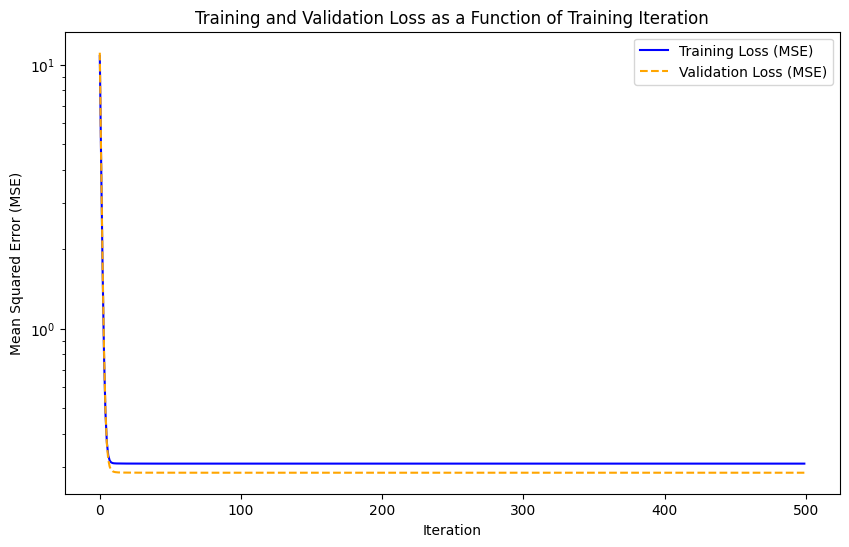

In [296]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

X_train , X_val, y_train, y_val = train_test_split(scaled_X_train, y_train, test_size=0.20, random_state=42)


sgd_reg = SGDRegressor(max_iter=1, warm_start=True, tol=0.0,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_pred = sgd_reg.predict(X_train)
    y_val_pred = sgd_reg.predict(X_val)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))


# Plot the training and validation MSE as a function of training iterations
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Training Loss (MSE)', color='blue')
plt.plot(val_errors, label='Validation Loss (MSE)', color='orange', linestyle='--')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss as a Function of Training Iteration')
plt.legend()
plt.show()




### F. Polynomial features

In [300]:

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

scaled_X_train = scaler.fit_transform(X_poly)
scaled_X_test = scaler.fit_transform(X_poly)

X_train , X_val, y_train, y_val = train_test_split(scaled_X_train, y_train, test_size=0.25, random_state=99)

In [301]:
kf = KFold(n_splits=3)
mse_scores = []

X_b = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]

for train_index, val_index in kf.split(X_b):
    X_train_fold, X_val_fold = X_b[train_index], X_b[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]


    theta_best = np.linalg.inv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)
    y_val_pred = X_val_fold.dot(theta_best)

    mse = mean_squared_error(y_val_fold, y_val_pred)
    mse_scores.append(mse)


mean_mse = np.mean(mse_scores)

print(f'Mean 3-Fold Cross-Validation MSE (Normal Equation): {mean_mse}')

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_poly)

penalities = [None, 'l1', 'l2', 'elasticnet']
penalty_names = {
        'l1': 'lasso',
        'l2' : 'ridge'
}

print("Testing Different Penalty Types")
for penalty in penalities:
    sgd = SGDRegressor(max_iter=1000, penalty=penalty, random_state=99)
    cv_scores = cross_val_score(sgd, scaled_X, y, cv=3, scoring='neg_mean_squared_error')
    average_mse  = -cv_scores.mean()
    
    penalty_display = penalty_names.get(penalty, penalty)
        
    print(f'{penalty_display}: {average_mse: .3f}')

In [ ]:
learning_rates = ['constant', 'optimal', 'invscaling', 'adaptive']

print("Testing Learning rate")
for rate in learning_rates:
    sgd = SGDRegressor(max_iter=1000, penalty=None, random_state=99, learning_rate=rate)
    cv_scores = cross_val_score(sgd, scaled_X, y, cv=3, scoring='neg_mean_squared_error')
    average_mse  = -cv_scores.mean()
        
    print(f'{rate}: {average_mse:.3f}')